In [12]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

In [13]:
place_name = "Greece"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link"]'
#cf = '["highway"~"motorway|motorway_link"]'
greece_graph = ox.graph_from_place(place_name, network_type='drive', custom_filter=cf)
#fig, ax = ox.plot_graph(graph)
greece_nodes, greece_edges = ox.graph_to_gdfs(greece_graph)

In [14]:
zogr = "Lasithi Regional Unit"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
#cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary_link|primary"]'
zogr_graph = ox.graph_from_place(zogr, network_type='drive')
zogr_nodes, zogr_edges = ox.graph_to_gdfs(zogr_graph)

In [15]:
G3 = nx.compose(greece_graph, zogr_graph)

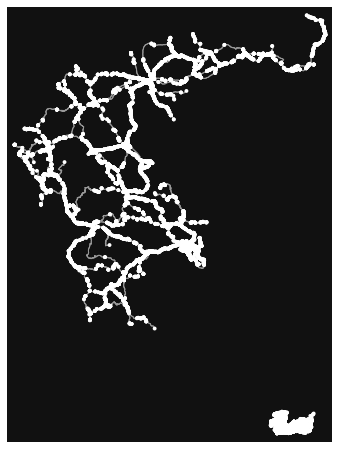

In [17]:
fig, ax = ox.plot_graph(G3)

In [26]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
#poleis = ['Komotini Municipality', 'Municipality of Athens', 'Municipality of Mytilene', 'Municipality of Patras', 'Municipality of Kozani','Ioannina Municipality','Municipality of Larissa','Corfu', 'Municipality of Thessaloniki', 'Municipality of Heraklion', 'Syros', 'Municipality of Tripoli', 'Lamia']
# already_done = ['Regional Unit of North Athens','Regional Unit of West Athens','Regional Unit of Central Athens','Regional Unit of South Athens','Regional Unit of East Attica','Municipality of Piraeus','Municipality of Western Lesvos','Ikaria Regional Unit','Chios Regional Unit','Municipality of Rhodes','Tinos Regional Unit','Heraklion Regional Unit','Lasithi Regional Unit','Rethymno Regional Unit','Chania Regional Unit','Evros Regional Unit','Xanthi Municipality','Rodopi Regional Unit','Drama Regional Unit','Kavala Regional Unit','Imathia Regional Unit','Thessaloniki Regional Unit']
poleis = ['Regional Unit of North Athens','Regional Unit of West Athens','Regional Unit of Central Athens','Regional Unit of South Athens','Regional Unit of East Attica','Municipality of Piraeus','Municipality of Western Lesvos','Ikaria Regional Unit','Chios Regional Unit','Municipality of Rhodes','Tinos Regional Unit','Heraklion Regional Unit','Lasithi Regional Unit','Rethymno Regional Unit','Chania Regional Unit','Evros Regional Unit','Xanthi Municipality','Rodopi Regional Unit','Drama Regional Unit','Kavala Regional Unit','Imathia Regional Unit','Thessaloniki Regional Unit','Kilkis Regional Unit','Pella Regional Unit','Pieria Regional Unit','Serres Regional Unit','Chalkidiki Regional Unit','Kozani Regional Unit','Kastoria Regional Unit','Florina Regional Unit','Arta Regional Unit','Thesprotia Regional Unit','Ioannina Regional Unit','Karditsa Regional Unit','Larisa Regional Unit','Regional Unit of Magnesia','Zakynthos Regional Unit','Corfu Regional Unit','Kefallonia Regional Unit','Lefkada Regional Unit','Aetolia-Acarnania Regional Unit','Achaea Regional Unit','Elis Regional Unit','Regional Unit of Boeotia','Euboea Regional Unit','Regional Unit of Evrytania','Phthiotis Regional Unit','Regional Unit of Phocis','Argos Regional Unit','Corinthia Regional Unit','Laconia Regional Unit']
for poli in poleis:
    print("now city is ", poli)
    zogr_graph = ox.graph_from_place(str(poli), network_type='drive')
    zogr_nodes, zogr_edges = ox.graph_to_gdfs(zogr_graph)
    destination = dest_graph_fpath + str(poli) +str('.graphml')
    ox.save_graphml(zogr_graph, destination)

now city is  Regional Unit of North Athens


KeyboardInterrupt: 

In [27]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
G_all = greece_graph
#poleis = ['Komotini Municipality', 'Municipality of Athens', 'Municipality of Mytilene', 'Municipality of Patras', 'Municipality of Kozani','Ioannina Municipality','Municipality of Larissa','Corfu', 'Municipality of Thessaloniki', 'Municipality of Heraklion', 'Syros', 'Municipality of Tripoli', 'Lamia']
poleis = ['Regional Unit of North Athens','Regional Unit of West Athens','Regional Unit of Central Athens','Regional Unit of South Athens','Regional Unit of East Attica','Municipality of Piraeus','Municipality of Western Lesvos','Ikaria Regional Unit','Chios Regional Unit','Municipality of Rhodes','Tinos Regional Unit','Heraklion Regional Unit','Lasithi Regional Unit','Rethymno Regional Unit','Chania Regional Unit','Evros Regional Unit','Xanthi Municipality','Rodopi Regional Unit','Drama Regional Unit','Kavala Regional Unit','Imathia Regional Unit','Thessaloniki Regional Unit','Kilkis Regional Unit','Pella Regional Unit','Pieria Regional Unit','Serres Regional Unit','Chalkidiki Regional Unit','Kozani Regional Unit','Kastoria Regional Unit','Florina Regional Unit','Arta Regional Unit','Thesprotia Regional Unit','Ioannina Regional Unit','Karditsa Regional Unit','Larisa Regional Unit','Regional Unit of Magnesia','Zakynthos Regional Unit','Corfu Regional Unit','Kefallonia Regional Unit','Lefkada Regional Unit','Aetolia-Acarnania Regional Unit','Achaea Regional Unit','Elis Regional Unit','Regional Unit of Boeotia','Euboea Regional Unit','Regional Unit of Evrytania','Phthiotis Regional Unit','Regional Unit of Phocis','Argos Regional Unit','Corinthia Regional Unit','Laconia Regional Unit']
for poli in poleis:
    local_path = dest_graph_fpath + str(poli) +str('.graphml')
    local_graph = ox.load_graphml(local_path)
    #G_all = nx.union(G_all, local_graph, rename=('G_all-','loc_graph-'))
    G_all = nx.compose(G_all, local_graph)
supergraph_dest = '../results/giorgos_regional_graph.graphml'
ox.save_graphml(G_all, supergraph_dest)
zogr_nodes, zogr_edges = ox.graph_to_gdfs(G_all)
print(len(zogr_nodes), len(zogr_edges))
#fig, ax = ox.plot_graph(G_all)

600466 1528244


In [28]:
#local_path = dest_graph_fpath + 'Corfu' +str('.graphml')
#local_graph = ox.load_graphml(local_path)
#nodes, edges = ox.graph_to_gdfs(local_graph)
G3 = G_all
nodes, edges = ox.graph_to_gdfs(G_all)

In [29]:
nodes, edges = ox.graph_to_gdfs(G3)
center = (37.714155,24.056792)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=8)

to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
print(from_marker)
to_marker = Marker(location=center, icon=to_marker_style)

def set_nearest_node(marker):
    marker.nearest_node = ox.get_nearest_node(G3, marker.location)
    return

path_layer_list = []

def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(G3, event_owner.location)
    marker.neares_node = ox.get_nearest_node(G3, marker.location)
    
    shortest_path = nx.dijkstra_path(G3, event_owner.nearest_node, marker.neares_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)
    
    
    
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

Marker(location=[37.714155, 24.056792], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'rotation_angle', 'rotation_origin', 'title', 'z_index_offset'])


Map(center=[37.714155, 24.056792], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [73]:
val = 7631969061 in nodes['osmid']
print(val)
print(to_marker.nearest_node)
print(len(nodes), len(edges))

True
2158143698
600466 1528244
